# Verra Carbon Analysis

## Setup

### Declare some information

In [42]:
# This lets python create graphs
import matplotlib.pyplot as plt

# This lets python read spreadsheets 
import csv

# This lets python read dates
import datetime

# This is the spreadsheet in row major order
table_row_major : list = [ ]

# This is the spreadsheet in column major order
table_column_major : list = [ ]

# This is the quantity of rows in the spreadsheet
table_row_count : int = 0

# This is the quantity of columns in the spreadsheet
table_column_count : int = 0

# This is what each column stores
column_identifiers : list = [
    "ID",
    "Name",
    "Proponent",
    "Project Type",
    "AFOLU Activities",
    "Methodology",
    "Status",
    "Country/Area",
    "Estimated Annual Emission Reductions",
    "Region",
    "Project Registration Date",
    "Crediting Period Start Date",
    "Crediting Period End Date"
]

# This is the set of unique elements in each column
unique_column_elements : list = [ ]

# This is the quantity of unique elements in each column
unique_column_elements_count : list = [ ]

### Make the table

In [43]:
# This part of the code creates a table from the spreadsheet 

# Open the spreadsheet
with open('allprojects.csv') as csv_file:

    # Parse the spreadsheet
    csv_reader = csv.reader(csv_file, delimiter=',')

    # For each row in the spreadsheet ...
    for row in csv_reader:

        # ... add the row to the table
        table_row_major.append(list(row))

# Update the row count
table_row_count = len(table_row_major)

# Update the column count
table_column_count = len(table_row_major[0])

# Create a column major table from the row major table
for column in range(table_column_count):
    
    # Declare a list for the column
    column_list : list = [ ]

    # For each column of each row ...
    for row in range(table_row_count):

        # ... add the cell to the list of column cells
        column_list.append(table_row_major[row][column])

    # Store the column
    table_column_major.append(column_list)

## Filters

### TODO


## Statistics

In [44]:
# This part of the code computes statistics about the dataset

# For each column
for c in range(table_column_count):

    # Remove duplicates from the column
    unique_column_elements.append(set(table_column_major[c]))

    # Count the number of unique items in the column
    unique_column_elements_count.append(len(set(table_column_major[c])))

### All

In [45]:
# This outputs a lot of data 

# Fix errors in status
unique_column_elements[6].remove('Status')


# Fix errors in Region
unique_column_elements[9].remove('')
unique_column_elements[9].remove('Region')

# Fix errors in Project registration date
unique_column_elements[10].remove('Project Registration Date')
table_column_major[10].remove('Project Registration Date')

for i in range(table_column_major[10].count('')):
    table_column_major[10].remove('')



# For each column in the table ...
for C in range(table_column_count):

    # ... print the name of the column, and the number of unique cells in said column ...
    print(f"\n\nVerra data set has {unique_column_elements_count[C]} unique {column_identifiers[C]}(s):")

    # ... then print each unique cell
    for c in sorted(unique_column_elements[C]):
        print(f" - {c}")




Verra data set has 3868 unique ID(s):
 - 1
 - 10
 - 100
 - 1000
 - 1001
 - 1002
 - 1003
 - 1004
 - 1006
 - 1007
 - 1008
 - 1009
 - 101
 - 1010
 - 1011
 - 1012
 - 1013
 - 1014
 - 1015
 - 1016
 - 1017
 - 1018
 - 1019
 - 102
 - 1020
 - 1021
 - 1022
 - 1023
 - 1024
 - 1025
 - 1026
 - 1027
 - 1028
 - 1029
 - 103
 - 1030
 - 1031
 - 1032
 - 1033
 - 1034
 - 1035
 - 1036
 - 1037
 - 1038
 - 1039
 - 104
 - 1040
 - 1041
 - 1042
 - 1043
 - 1044
 - 1045
 - 1046
 - 1047
 - 1048
 - 1049
 - 105
 - 1050
 - 1051
 - 1052
 - 1053
 - 1054
 - 1055
 - 1056
 - 1057
 - 1058
 - 1059
 - 106
 - 1060
 - 1061
 - 1062
 - 1063
 - 1064
 - 1065
 - 1066
 - 1067
 - 1068
 - 1069
 - 107
 - 1070
 - 1071
 - 1072
 - 1073
 - 1074
 - 1075
 - 1076
 - 1077
 - 1078
 - 1079
 - 108
 - 1080
 - 1081
 - 1082
 - 1083
 - 1084
 - 1085
 - 1086
 - 1087
 - 1088
 - 1089
 - 109
 - 1090
 - 1091
 - 1092
 - 1093
 - 1094
 - 1095
 - 1096
 - 1097
 - 1098
 - 1099
 - 11
 - 110
 - 1100
 - 1101
 - 1102
 - 1103
 - 1104
 - 1105
 - 1106
 - 1107
 - 1108
 -

### IDs

### Names

### Proponents

### Project Types

### AFOLU Activities

### Methodologies

### Statuses

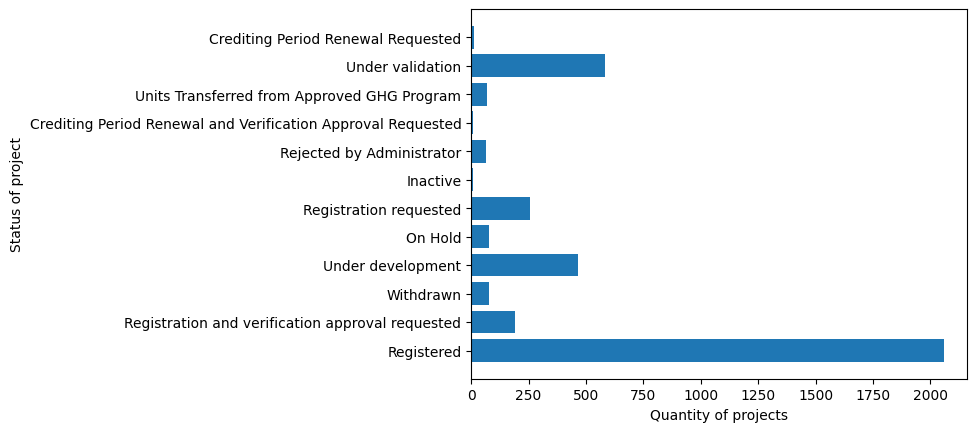

In [46]:
# Make a bar chart for the quantity of statuses of each project
regions : list = list(unique_column_elements[6])
region_count : list = [ ]

for r in range(len(regions)):
    z = table_column_major[6].count(regions[r])
    region_count.append(z)

# Set the X axis label
plt.xlabel("Quantity of projects")

# Set the Y axis label
plt.ylabel("Status of project")

# Create a horizontal bar graph
plt.barh(width=region_count, y=regions)

# Show it
plt.show()

### Countries

In [47]:
# Make a bar chart for the quantity of projects in each region
#regions : list = list(unique_column_elements[9])
#region_count : list = [ ]

#for r in range(len(regions)):
#    z = table_column_major[9].count(regions[r])
#    region_count.append(z)

# Set the X axis label
#plt.xlabel("Quantity of projects")

# Set the Y axis label
#plt.ylabel("Region")

# Create a horizontal bar graph
#plt.barh(width=region_count, y=regions)

# Show it
#plt.show()

### Estimated Annual Emission Reductions

### Region

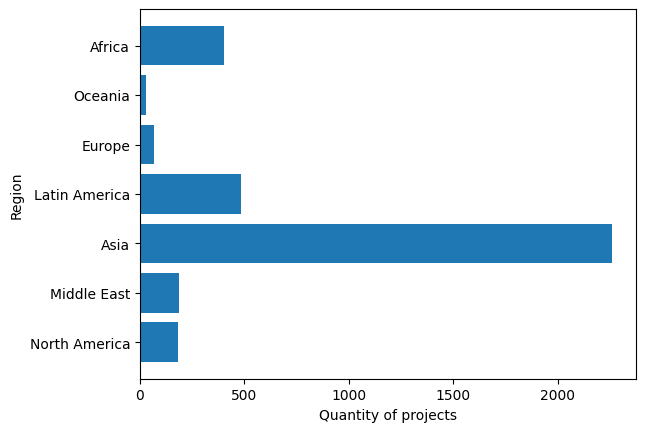

In [48]:
# Make a bar chart for the quantity of projects in each region
regions : list = list(unique_column_elements[9])
region_count : list = [ ]

for r in range(len(regions)):
    z = table_column_major[9].count(regions[r])
    region_count.append(z)

# Set the X axis label
plt.xlabel("Quantity of projects")

# Set the Y axis label
plt.ylabel("Region")

# Create a horizontal bar graph
plt.barh(width=region_count, y=regions)

# Show it
plt.show()

### Project Registration Date

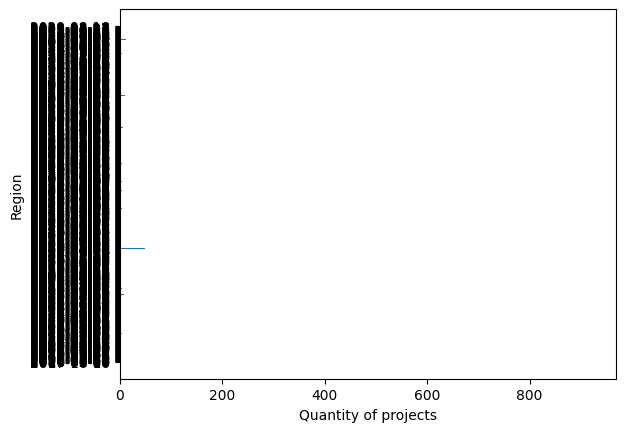

In [49]:
# Make a bar chart for project registration date
regions : list = list(unique_column_elements[10])
region_count : list = [ ]

for r in range(len(regions)):
    z = table_column_major[10].count(regions[r])
    region_count.append(z)

# Set the X axis label
plt.xlabel("Quantity of projects")

# Set the Y axis label
plt.ylabel("Region")

# Create a horizontal bar graph
plt.barh(width=region_count, y=regions)

# Show it
plt.show()


[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
[76, 78, 52, 64, 75, 55, 44, 15, 26, 37, 73, 1083, 104, 187, 181]
[2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2022, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2022, 2023, 2022, 2023, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2023, 2023, 2022, 2023, 2023, 2022, 2022, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2022, 2023, 2023, 2023, 2022, 2022, 2023, 2023, 2022, 2023, 2023, 2023, 2022, 2023, 2023, 2023, 2023, 2022, 2022, 2023, 2023, 2023, 2023, 2023, 2022, 2023, 2022, 2023, 2023, 2023, 2022, 2022, 2023, 2022, 2023, 2023, 2023, 2022, 2022, 2023, 2023, 2023, 2022, 2023, 2023, 2023, 2023, 2022, 2023, 2023, 20

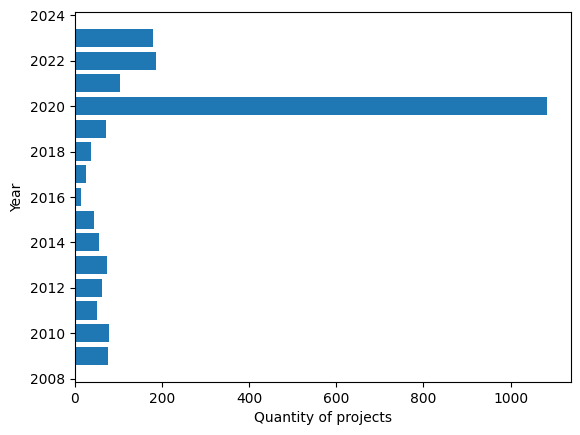

In [50]:
# Make a bar chart for project registration year
ryr_dates_m : list = table_column_major[10]
ryr_date_month : list = [ ]
ryr_date_count_year : list = [ ]
ryr_date_ctr_month : list = [ ]

for r in range(len(ryr_dates_m)):
    dty = datetime.datetime.strptime(ryr_dates_m[r], "%Y-%m-%d")
    ryr_date_month.append(dty.year)

ryr_date_count_month = list(sorted(set(ryr_date_month)))
print(ryr_date_count_month)

for i, y in enumerate(ryr_date_count_month):
    ryr_date_ctr_month.append(ryr_date_month.count(y))

print(ryr_date_ctr_month)
print(ryr_date_month)

# Set the X axis label
plt.xlabel("Quantity of projects")

# Set the Y axis label
plt.ylabel("Year")

# Create a horizontal bar graph
plt.barh(width=ryr_date_ctr_month, y=ryr_date_count_month)

# Show it
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[109, 80, 120, 1006, 78, 141, 110, 111, 102, 76, 93, 124]
[10, 8, 7, 8, 7, 9, 6, 5, 5, 8, 5, 5, 1, 8, 8, 9, 6, 5, 3, 10, 10, 4, 6, 9, 8, 5, 3, 8, 6, 6, 7, 7, 9, 2, 5, 6, 9, 7, 9, 8, 6, 3, 12, 6, 6, 6, 5, 6, 8, 8, 8, 6, 6, 10, 6, 6, 3, 8, 1, 8, 12, 1, 12, 9, 11, 11, 11, 11, 12, 12, 11, 11, 6, 8, 12, 2, 1, 12, 12, 3, 6, 2, 7, 1, 9, 2, 3, 2, 3, 7, 10, 9, 3, 3, 11, 12, 5, 3, 10, 3, 5, 6, 12, 3, 5, 2, 2, 10, 12, 7, 3, 2, 6, 8, 12, 9, 11, 9, 7, 1, 8, 8, 5, 8, 1, 1, 1, 10, 8, 1, 1, 1, 12, 7, 5, 3, 4, 12, 1, 5, 6, 1, 3, 8, 10, 1, 3, 12, 12, 1, 12, 1, 5, 6, 12, 12, 9, 3, 1, 2, 2, 2, 1, 1, 2, 9, 1, 12, 1, 1, 1, 8, 10, 2, 10, 3, 11, 2, 12, 8, 9, 9, 9, 12, 3, 10, 9, 9, 8, 7, 8, 2, 8, 8, 12, 7, 12, 12, 12, 11, 11, 11, 12, 1, 8, 9, 4, 9, 2, 11, 12, 12, 9, 1, 1, 11, 10, 11, 11, 1, 1, 9, 12, 1, 10, 9, 8, 10, 8, 9, 6, 9, 8, 9, 11, 8, 1, 12, 3, 4, 1, 2, 7, 10, 5, 4, 8, 1, 4, 2, 2, 1, 7, 3, 6, 11, 4, 8, 12, 1, 1, 5, 11, 3, 10, 7, 4, 10, 12, 7, 5, 8, 3, 7, 12, 1, 3,

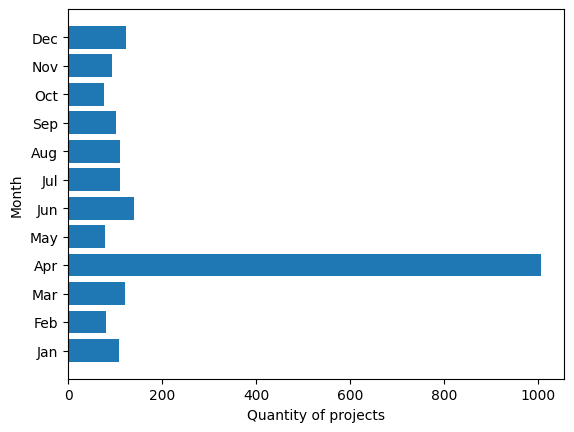

In [51]:
# Make a bar chart for project registration year
ryr_dates_m : list = table_column_major[10]
ryr_date_month : list = [ ]
ryr_date_count_year : list = [ ]
ryr_date_ctr_month : list = [ ]

for r in range(len(ryr_dates_m)):
    dty = datetime.datetime.strptime(ryr_dates_m[r], "%Y-%m-%d")
    ryr_date_month.append(dty.month)

ryr_date_count_month = list(sorted(set(ryr_date_month)))
print(ryr_date_count_month)

for i, y in enumerate(ryr_date_count_month):
    ryr_date_ctr_month.append(ryr_date_month.count(y))

print(ryr_date_ctr_month)
print(ryr_date_month)

# Set the X axis label
plt.xlabel("Quantity of projects")

# Set the Y axis label
plt.ylabel("Month")

# Create a horizontal bar graph
plt.barh(width=ryr_date_ctr_month, y=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

# Show it
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[37, 35, 28, 82, 39, 950, 50, 53, 38, 45, 53, 40, 41, 54, 45, 37, 38, 48, 24, 41, 34, 25, 43, 28, 32, 30, 41, 27, 50, 37, 25]
[11, 21, 26, 18, 3, 28, 21, 4, 30, 21, 31, 31, 9, 22, 8, 11, 7, 24, 2, 4, 18, 11, 13, 5, 21, 12, 6, 8, 21, 21, 27, 31, 25, 6, 30, 21, 7, 3, 29, 18, 13, 30, 7, 22, 1, 23, 30, 5, 15, 18, 3, 13, 14, 4, 14, 14, 20, 23, 10, 30, 20, 10, 21, 14, 18, 29, 18, 18, 7, 7, 29, 18, 28, 18, 22, 22, 12, 27, 5, 1, 7, 8, 12, 5, 2, 3, 8, 2, 10, 21, 26, 29, 30, 15, 14, 27, 11, 15, 27, 23, 15, 14, 6, 3, 30, 10, 3, 1, 12, 26, 9, 1, 7, 8, 13, 20, 25, 14, 5, 25, 8, 8, 30, 18, 25, 25, 25, 3, 8, 27, 27, 27, 7, 18, 17, 27, 14, 28, 19, 9, 20, 30, 17, 1, 17, 19, 10, 7, 14, 23, 14, 20, 1, 2, 27, 12, 29, 3, 31, 27, 23, 27, 30, 30, 20, 12, 8, 15, 23, 5, 11, 24, 7, 13, 4, 9, 3, 8, 23, 23, 27, 1, 1, 30, 29, 27, 27, 27, 15, 8, 28, 9, 16, 16, 16, 17, 2, 15, 15, 29, 29, 29, 27, 11, 5,

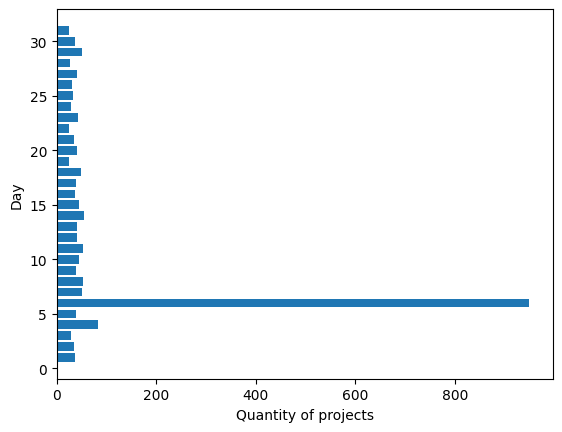

In [52]:
# Make a bar chart for project registration year
ryr_dates_m : list = table_column_major[10]
ryr_date_month : list = [ ]
ryr_date_count_year : list = [ ]
ryr_date_ctr_month : list = [ ]

for r in range(len(ryr_dates_m)):
    dty = datetime.datetime.strptime(ryr_dates_m[r], "%Y-%m-%d")
    ryr_date_month.append(dty.day)

ryr_date_count_month = list(sorted(set(ryr_date_month)))
print(ryr_date_count_month)

for i, y in enumerate(ryr_date_count_month):
    ryr_date_ctr_month.append(ryr_date_month.count(y))

print(ryr_date_ctr_month)
print(ryr_date_month)

# Set the X axis label
plt.xlabel("Quantity of projects")

# Set the Y axis label
plt.ylabel("Day")

# Create a horizontal bar graph
plt.barh(width=ryr_date_ctr_month, y=ryr_date_count_month)

# Show it
plt.show()

### Crediting Period Start Date

### Crediting Period End Date